# 2018&2019資料關係圖

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('../archive/report_2018-2019.csv')

### Analysing the relationships between numerical variables: Heatmap

<Axes: >

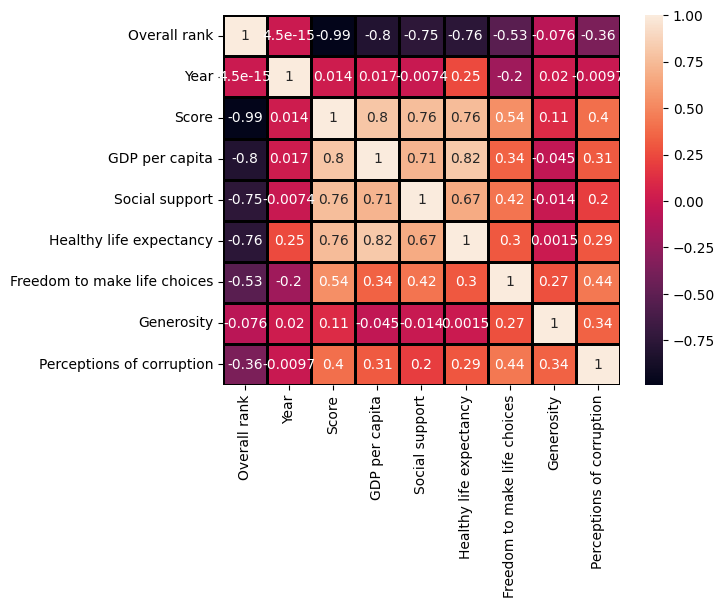

In [3]:
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation, linewidths=2,linecolor='k', annot=True)

Positive correlations spotted between score and others:
* Score and GDP per capita	(Very strong)
* Score and  Social support (Very strong)
* Score and  Healthy life expectancy (Very strong)
* Score and  Freedom to make life choices (strong)
* Score and  Generosity (weak)
* Score and  Perceptions of corruption (strong)

as ranks are based on score we are analyzing relation between score and other variables.

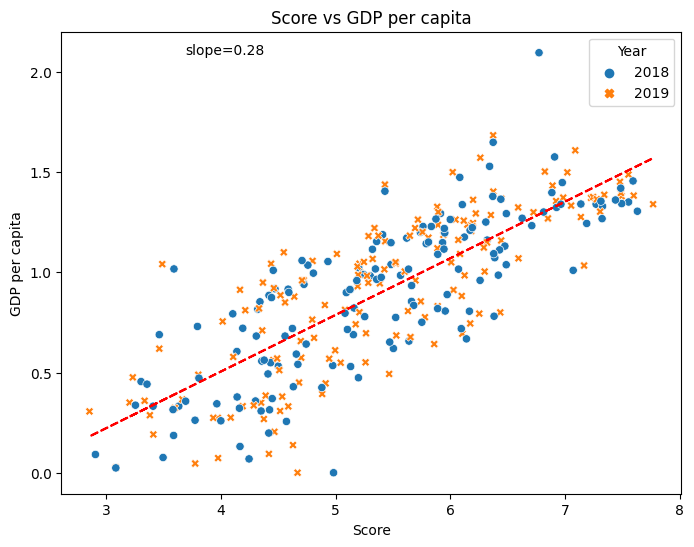

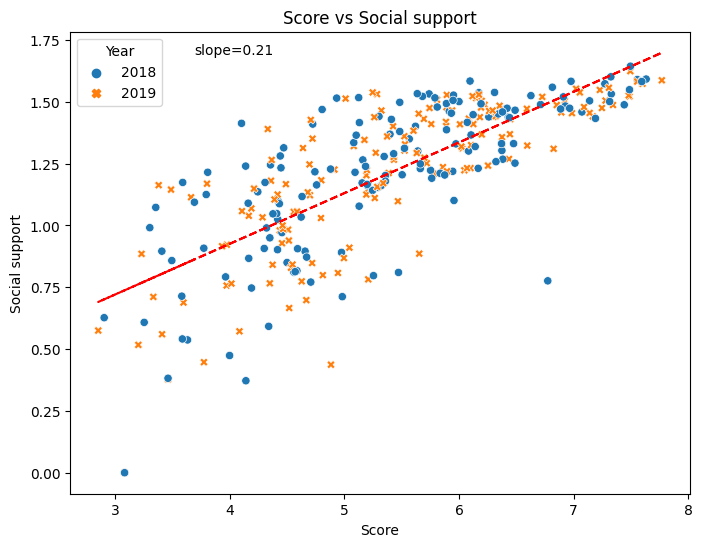

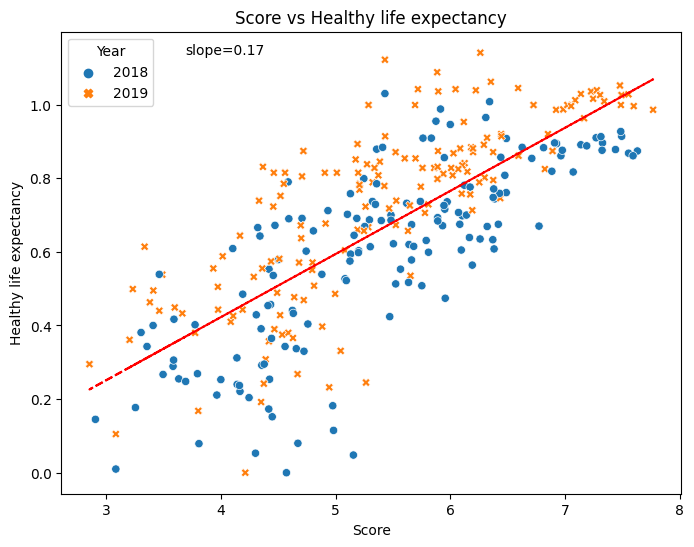

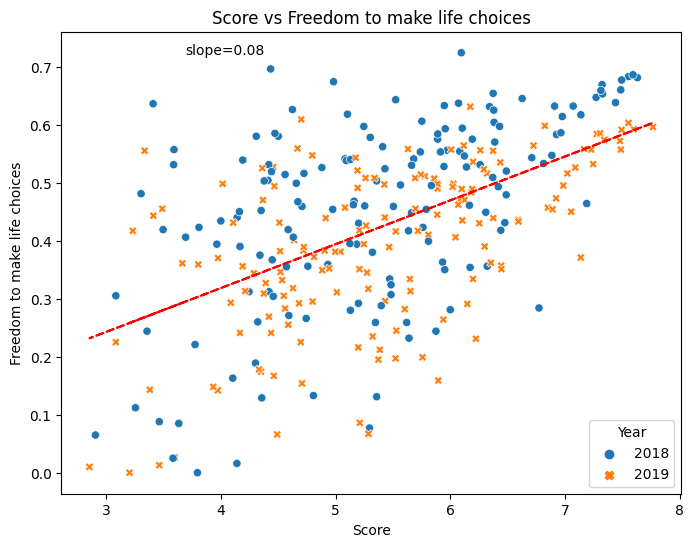

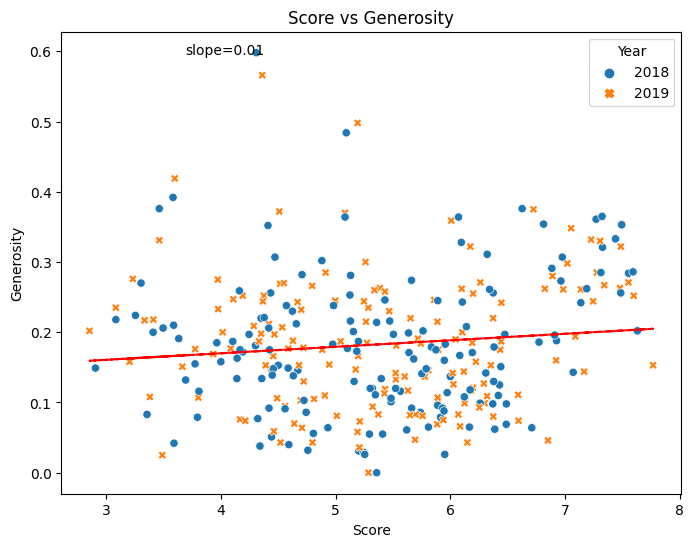

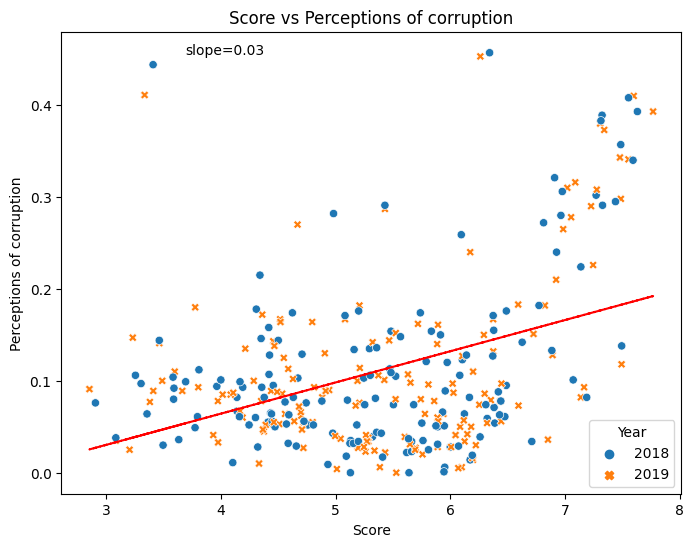

In [35]:
# Convert the 'Year' column to categorical
df["Year"] = df["Year"].astype("category")

# Helper function to plot relationship between two variables
def RelationshipLinearReg(x, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, hue="Year", style="Year")

    z = np.polyfit(df[x], df[y], 1)
    p = np.poly1d(z)
    plt.plot(df[x], p(df[x]), "r--")
    plt.annotate("slope={:.2f}".format(z[0]), xy=(df[x].min(), p(df[x].min())), xytext=(0.2, 0.95), textcoords='axes fraction')

    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


# Plotting the relationship between GDP per capita and happiness score
#RelationshipLinearReg("GDP per capita", "Score")
RelationshipLinearReg("Score", "GDP per capita")

# Plotting the relationship between social support and happiness score
#RelationshipLinearReg("Social support", "Score")
RelationshipLinearReg("Score", "Social support")
# Plotting the relationship between healthy life expectancy and happiness score
#RelationshipLinearReg("Healthy life expectancy", "Score")
RelationshipLinearReg("Score", "Healthy life expectancy")

# Plotting the relationship between freedom to make life choices and happiness score
#RelationshipLinearReg("Freedom to make life choices", "Score")
RelationshipLinearReg("Score", "Freedom to make life choices")

# Plotting the relationship between generosity and happiness score
#RelationshipLinearReg("Generosity", "Score")
RelationshipLinearReg("Score", "Generosity")

# Plotting the relationship between perceptions of corruption and happiness score
#RelationshipLinearReg("Perceptions of corruption", "Score")
RelationshipLinearReg("Score", "Perceptions of corruption")

* 上3個有點關係，下3個沒啥關係(透過heatmap也看出來的)

In [8]:
#linear regression model for year 2018+2019
import pandas as pd
import statsmodels.api as sm

# Define independent and dependent variables
X = df[['Overall rank', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Score']

# Fit linear regression model
X = sm.add_constant(X) # Add intercept term
lin_reg = sm.OLS(y, X).fit()

# Print results
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2618.
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.79e-267
Time:                        23:27:33   Log-Likelihood:                 165.95
No. Observations:                 312   AIC:                            -315.9
Df Residuals:                     304   BIC:                            -286.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

```
作者的話:
The regression model indicates that the independent variables, namely GDP per capita, social support, freedom to make life choices, generosity, and perceptions of corruption, significantly influence the dependent variable, which is the Happiness Index Score. This finding suggests that variations in the aforementioned independent variables can considerably affect the level of happiness in a given population.

It is worth noting that all the independent variables have p-values less than 0.05, indicating that they are statistically significant in the model. Additionally, the adjusted R squared value of 0.986 is indicative of a robust model, which can explain 98.6% of the variance in the dependent variable.

Moreover, the p-value associated with the F statistics is also less than 0.05, further strengthening the evidence that the model is significant and capable of producing reliable results. Overall, these findings suggest that the regression model is valid and can be used to make accurate predictions about the Happiness Index Score based on the selected independent variables.
```
```
作者的話2:
A regression analysis was conducted to investigate the influence of social support, freedom to make life choices, generosity, and perceptions of corruption on the happiness index score. The analysis revealed that all independent variables significantly influenced the dependent variable, indicating that the happiness index score varied greatly based on these factors. The statistical significance of these variables was confirmed by a p-value of less than 0.05. The robustness of the model was also demonstrated by an adjusted R squared value of 0.981. Moreover, the p-value associated with F statistics was less than 0.05, suggesting that the model was good. These findings suggest that policymakers and organizations could target these independent variables to enhance overall happiness levels.
```